In [1]:
import pandas as pd

/var/folders/x0/b0s4r41d0312h6mf4w2sqpfr0000gn/T/ipykernel_7403/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ms = pd.read_csv('../data/microsoft.csv', index_col='Date', parse_dates=True)

ms['ma10'] = ms['Close'].rolling(10).mean()  # fast signal
ms['ma50'] = ms['Close'].rolling(50).mean()  #slow signal

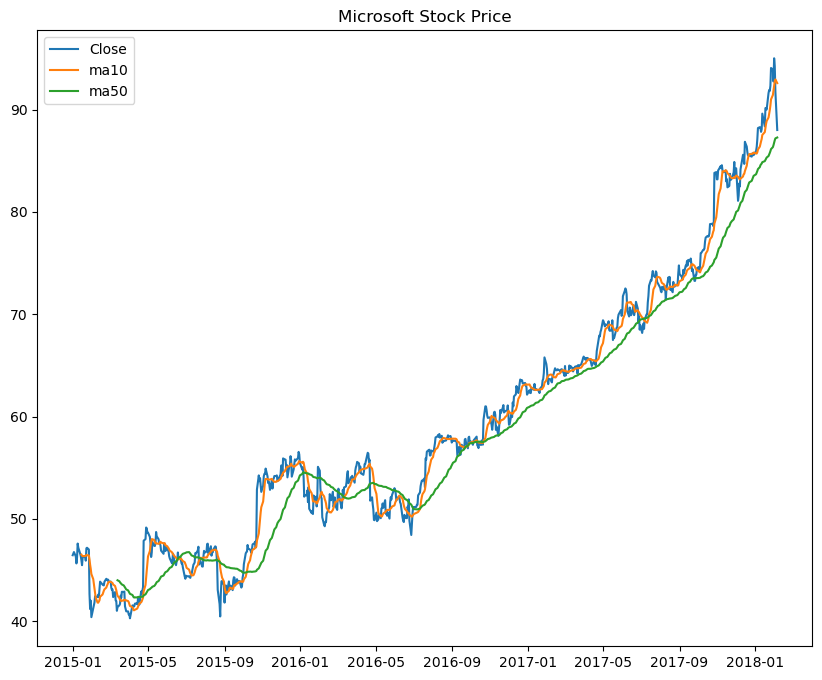

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Microsoft Stock Price')
plt.plot(ms['Close'], label='Close')
plt.plot(ms['ma10'], label='ma10')
plt.plot(ms['ma50'], label='ma50')
plt.legend()
plt.show()


## Our Strategy will be:
    - if fast signal crosses above the slow signal, we buy;
    - if fast signal crosses below the slow signal, we sell.

In [4]:
#Long or not?
ms['Shares'] = [1 if ms.loc[i,'ma10'] > ms.loc[i,'ma50'] else 0 for i in ms.index]

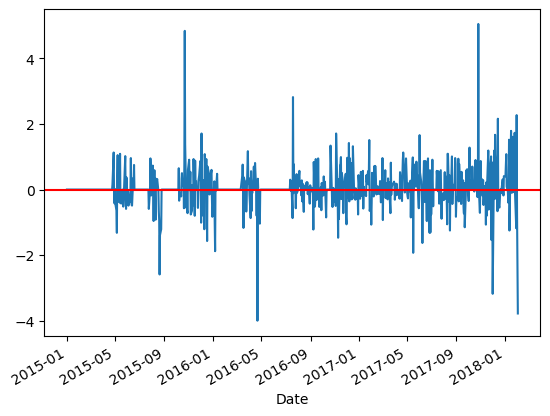

In [5]:
#now we add daily profit and total profit
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[i, 'Close1'] - ms.loc[i, 'Close'] if ms.loc[i, 'Shares']==1 else 0 for i in ms.index]

ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [6]:
#cumulative profit
ms['wealth'] = ms['Profit'].cumsum()
ms['wealth'].tail()

Date
2018-01-30    30.540009
2018-01-31    29.790009
2018-02-01    27.310006
2018-02-02    23.530007
2018-02-05          NaN
Name: wealth, dtype: float64

total profit: 23.53000699999999
total money spent: 46.450001


<Axes: xlabel='Date'>

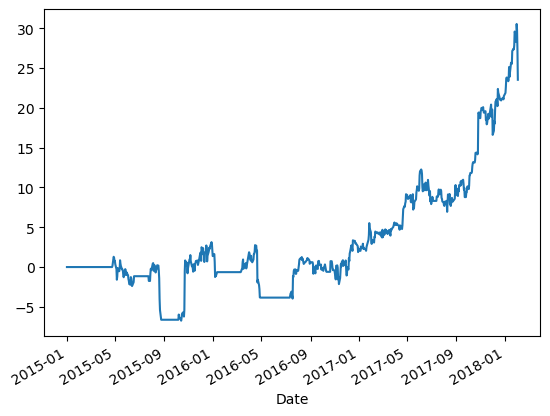

In [7]:
#print profit
print("total profit:", ms.loc[ms.index[-2], 'wealth'])
print("total money spent:", ms.loc[ms.index[0], 'Close'])

#plot wealth
ms['wealth'].plot()